# Exploratory Data Analysis of Audio data

In [1]:
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import IPython.display as ipd

filepath = "UrbanSound8K/audio/fold1/51022-3-7-0.wav"
ipd.Audio(filepath)

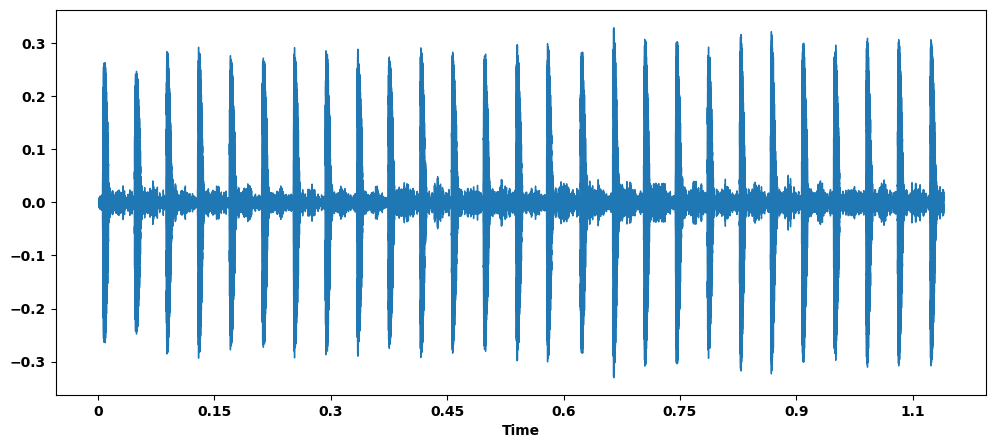

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

data, sample_rate = librosa.load(filepath)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

44100
[[-297  -77]
 [-213   70]
 [-312   12]
 ...
 [-346 -247]
 [-354 -149]
 [   4   63]]


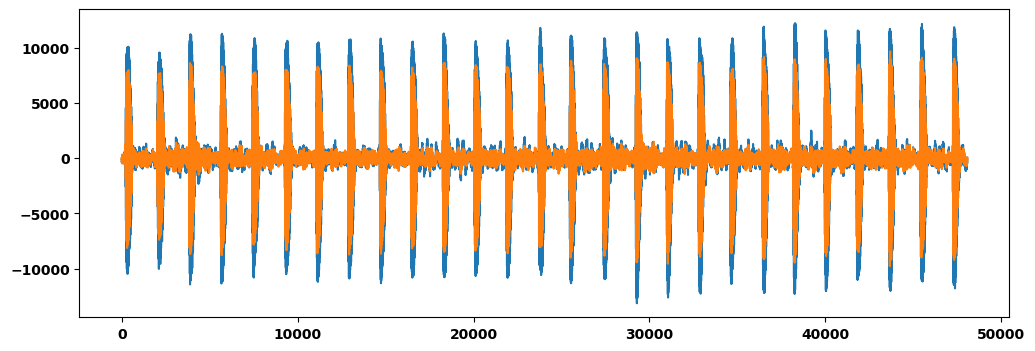

In [3]:
# not recommended
import scipy.io.wavfile as wav

wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)

plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Imbalance Dataset check

In [4]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

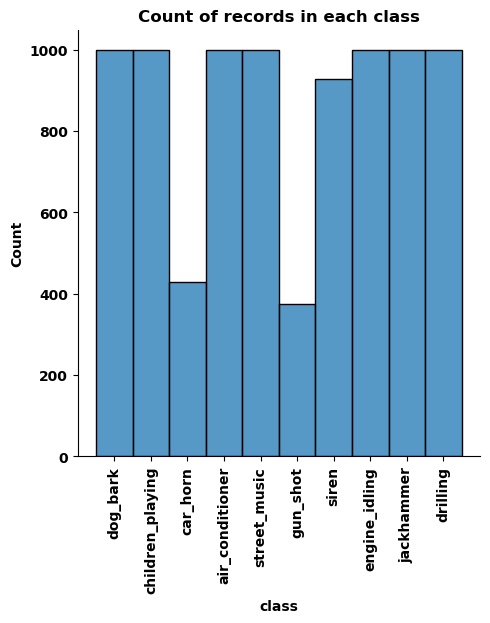

In [6]:
import seaborn as sns
# plt.figure(figsize=(10, 6))
# sns.countplot(metadata['class'])
# sns.displot expect Series, 1d-array, or list. as 1st argument, not whole!
sns.displot(metadata['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

# Data Preprocessing

(128, 47)
[[-3.0183932e+02 -2.7739447e+02 -2.7112619e+02 ... -2.6081686e+02
  -2.6547592e+02 -2.6674850e+02]
 [ 4.0948402e+01  5.2450958e+01  5.8762852e+01 ...  7.2143188e+01
   7.0564362e+01  6.3760544e+01]
 [-6.1408592e+01 -6.2314140e+01 -5.4252296e+01 ... -5.3847221e+01
  -5.1989395e+01 -4.8518467e+01]
 ...
 [ 2.1788597e+00  6.5383911e-02 -2.2843895e+00 ...  6.2255859e-03
   1.1938820e+00  6.0923767e-01]
 [ 2.1276989e+00 -6.9766426e-01 -1.3700542e+00 ... -1.2302589e+00
   6.2242889e-01 -8.4534836e-01]
 [-1.1442375e+00 -1.4918213e+00 -1.1013222e+00 ... -2.3859787e-01
   5.7737350e-01 -3.3175468e-01]]


<function matplotlib.pyplot.show(close=None, block=None)>

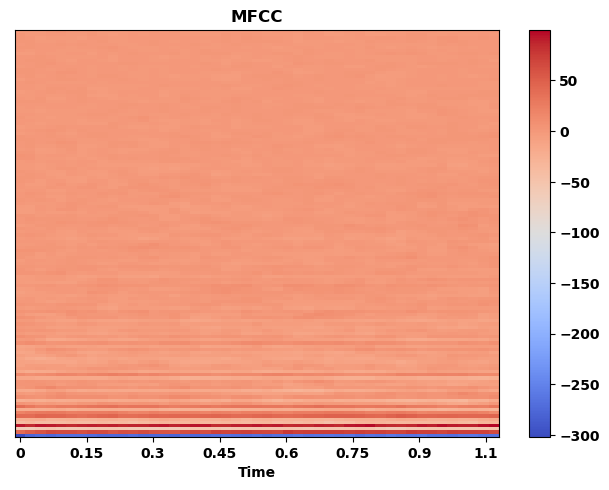

In [7]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=8732)
print(mfccs.shape)
print(mfccs)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('MFCC')
plt.show

In [8]:
import numpy as np


def features_extractor():
    #load the file (audio)
    aud, samp_rate = librosa.load(file_name, res_type='kaiser_fast')
    #we extract mfcc
    mfccs_feats = librosa.feature.mfcc(y=aud, sr=samp_rate, n_mfcc=8732)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_feats = np.mean(mfccs_feats.T, axis=0)
    return mfccs_scaled_feats

In [9]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

#Now we need to extract the featured from all the audio files, so we use tqdm
from tqdm import tqdm

# Now we iterate through every audio file and extract features
# using Mel-Frequency Cepstral Coefficients (MFCC)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('UrbanSound8K/audio'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor()
    extracted_features.append([data,final_class_labels])

3554it [02:48, 18.97it/s]C:\Users\ashva\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [06:42, 29.56it/s]C:\Users\ashva\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\ashva\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [07:03, 20.63it/s]


In [10]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


# Train Test split

In [11]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

# Label Encoding -> Label Encoder
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
y=to_categorical(label_encoder.fit_transform(y))

# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Audio Classification Model Creation

In [12]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# No of classes
num_labels=y.shape[1]
print(num_labels)

model: object=Sequential()

#first layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#second layer
model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'],optimizer='adam')

10


In [13]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 50
num_batch_size = 32

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[cp_callback], verbose=1)

# creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch
os.listdir(checkpoint_dir)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

# Display the model's architecture
model.summary()

duration = datetime.now() - start

print("Training completed in time: ", duration)

Epoch 1/50
219/219 [==============================] - 9s 33ms/step - loss: 3.4382 - accuracy: 0.3801 - precision: 0.4824 - recall: 0.2399 - val_loss: 1.3681 - val_accuracy: 0.5409 - val_precision: 0.7842 - val_recall: 0.2725

Epoch 00001: val_loss improved from inf to 1.36808, saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets
Epoch 2/50
219/219 [==============================] - 7s 31ms/step - loss: 1.2413 - accuracy: 0.5893 - precision: 0.7470 - recall: 0.4501 - val_loss: 1.0196 - val_accuracy: 0.6514 - val_precision: 0.8095 - val_recall: 0.5083

Epoch 00002: val_loss improved from 1.36808 to 1.01963, saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets
Epoch 3/50
219/219 [==============================] - 7s 32ms/step - loss: 0.9489 - accuracy: 0.6916 - precision: 0.8177 - recall: 0.5791 - val_loss: 0.7526 - val_accuracy: 0.7579 - val_precision: 0.8803 - val_recall: 0.6359

Epoch 00003: val_loss 

219/219 [==============================] - 7s 32ms/step - loss: 0.2475 - accuracy: 0.9220 - precision: 0.9434 - recall: 0.9048 - val_loss: 0.3868 - val_accuracy: 0.9073 - val_precision: 0.9421 - val_recall: 0.8752

Epoch 00025: val_loss did not improve from 0.35340
Epoch 26/50
219/219 [==============================] - 7s 31ms/step - loss: 0.2881 - accuracy: 0.9135 - precision: 0.9346 - recall: 0.8976 - val_loss: 0.4683 - val_accuracy: 0.8855 - val_precision: 0.9131 - val_recall: 0.8666

Epoch 00026: val_loss did not improve from 0.35340
Epoch 27/50
219/219 [==============================] - 7s 30ms/step - loss: 0.2491 - accuracy: 0.9228 - precision: 0.9443 - recall: 0.9049 - val_loss: 0.3641 - val_accuracy: 0.9084 - val_precision: 0.9361 - val_recall: 0.8895

Epoch 00027: val_loss did not improve from 0.35340
Epoch 28/50
219/219 [==============================] - 7s 32ms/step - loss: 0.2563 - accuracy: 0.9208 - precision: 0.9406 - recall: 0.9038 - val_loss: 0.3380 - val_accuracy: 0.90

In [14]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# Evaluate the model
test_accuracy =model.evaluate(X_test,y_test,verbose=2)
print("Accuracy: {:.2f}%".format(test_accuracy[1]*100))

55/55 - 0s - loss: 0.3734 - accuracy: 0.9101 - precision: 0.9337 - recall: 0.8941
Accuracy: 91.01%


In [15]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

#model.predict_classes(X_test)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[5 3 4 ... 1 2 2]


# Metric Visualization

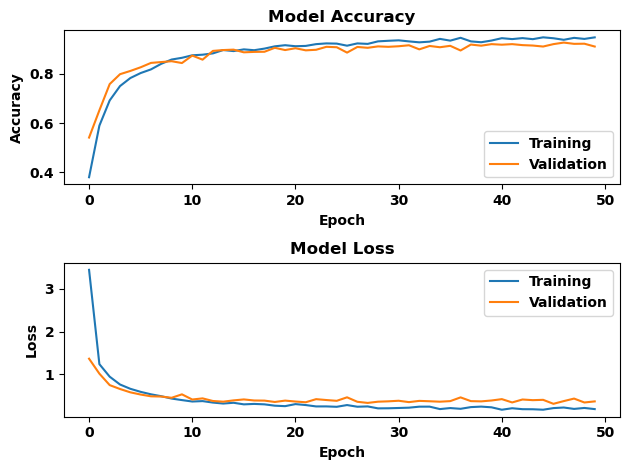

In [16]:
# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

<AxesSubplot: title={'center': 'Confusion Matrix for CAC w/o norm'}, xlabel='Predicted label', ylabel='True label'>

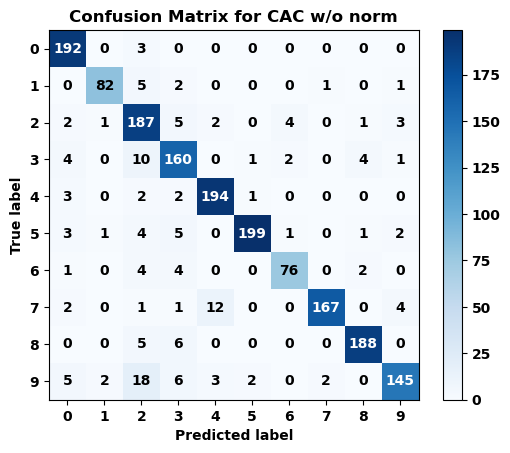

In [17]:
import scikitplot as skplt

# convert tests labels in single-digits instead of one-hot encoding!
y_test_arg=np.argmax(y_test,axis=1)
skplt.metrics.plot_confusion_matrix(y_test_arg, classes_x, normalize=False, title = 'Confusion Matrix for CAC w/o norm')

<AxesSubplot: title={'center': 'Confusion Matrix for CAC with norm'}, xlabel='Predicted label', ylabel='True label'>

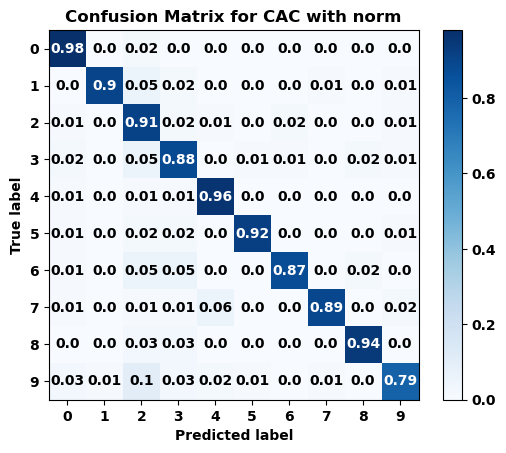

In [18]:
skplt.metrics.plot_confusion_matrix(y_test_arg, classes_x, normalize=True, title = 'Confusion Matrix for CAC with norm')

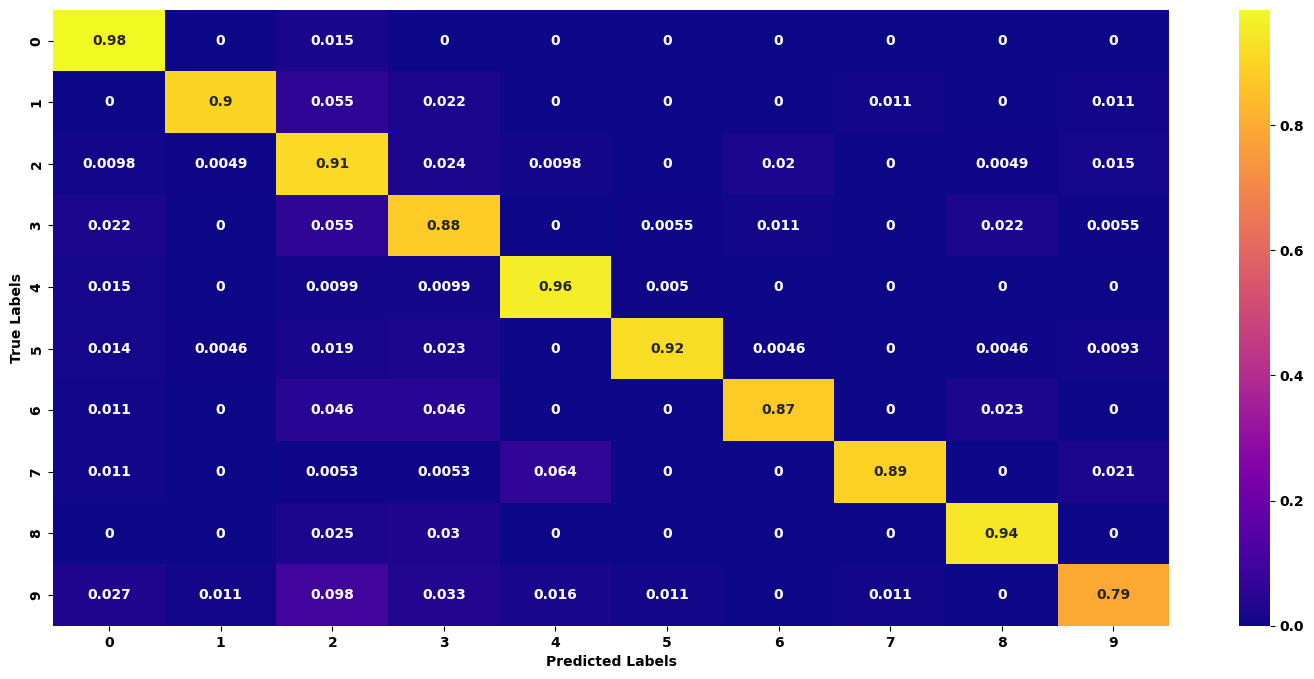

In [19]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test_arg, classes_x, normalize='true'), annot = True, cmap = 'plasma')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Testing an Audio Sample

In [20]:
import IPython.display as ipd
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

filepath = "UrbanSound8K/audio/fold1/7061-6-0-0.wav"
ipd.Audio(filepath)

#preprocess the audio file
audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=8732)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

new_model = tf.keras.models.load_model('my_model.h5')

#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=new_model.predict(mfccs_scaled_features)
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
# prediction_class = LabelEncoder.inverse_transform(predicted_label)
# print(prediction_class)

[8]
